# Radar Chart Attempt


In [37]:
import pandas as pd
from math import pi
import matplotlib.pyplot as plt
from mplsoccer import Radar, FontManager

In [15]:
Messi = {'Pace':89,'Shooting':90,'Passing':86,'Dribbling':95,'Defending':26,'Physical':61}
Ronaldo = {'Pace':90,'Shooting':93,'Passing':82,'Dribbling':90,'Defending':33,'Physical':80}

data = pd.DataFrame([Messi,Ronaldo], index = ["Messi","Ronaldo"])

In [16]:
data.head()

,Pace,Shooting,Passing,Dribbling,Defending,Physical
Messi,89,90,86,95,26,61
Ronaldo,90,93,82,90,33,80


In [2]:
sancho = pd.read_csv('/Users/weiyiwang/code/TheWangAndOnly/Football/Data/Players/Sancho20-21.csv')

In [3]:
sancho = sancho.dropna()

In [4]:
sancho = sancho[['Statistic','Percentile']]

In [6]:
sancho

,0,1,2,3,4,5,6,8,9,10,11,12,13,14,16,17,18,19,20,21
Statistic,Non-Penalty Goals,npxG,Shots Total,Assists,xA,npxG+xA,Shot-Creating Actions,Passes Attempted,Pass Completion %,Progressive Passes,Progressive Carries,Dribbles Completed,Touches (Att Pen),Progressive Passes Rec,Pressures,Tackles,Interceptions,Blocks,Clearances,Aerials won
Percentile,73.0,72.0,56.0,99.0,92.0,86.0,96.0,99.0,76.0,97.0,97.0,96.0,82.0,93.0,7.0,5.0,33.0,80.0,29.0,6.0


In [21]:
sancho = sancho.set_index('Statistic',inplace=True)
sancho = sancho.transpose()

KeyError: "None of ['Statistic'] are in the columns"

In [39]:
sancho = sancho.T

In [50]:
i = sancho.iloc[0].tolist()
i += i[:]

In [51]:
i += i[:]

ValueError: The number of FixedLocator locations (40), usually from a call to set_ticks, does not match the number of ticklabels (20).

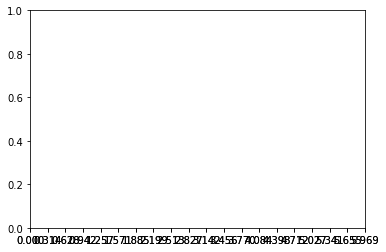

In [61]:
AttNo = len(list(sancho))
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:]
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:]
plt.xticks(angles,list(sancho))

In [59]:
def radar_chart(data):
    
    Attributes = list(data)
    AttNo= len(Attributes)
    values = data.iloc[0].tolist()
    values += values [:]
    angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
    angles += angles [:]
    angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
    angles += angles [:]
    ax = plt.subplot(111, polar=True)

    #Add the attribute labels to our axes
    plt.xticks(angles,Attributes)

    #Plot the line around the outside of the filled area, using the angles and values calculated before
    ax.plot(angles,values)

    #Fill in the area plotted in the last line
    ax.fill(angles, values, 'teal', alpha=0.1)

    #Give the plot a title and show it
    ax.set_title("Ronaldo")
    
    return plt.show()

# Radar Chart Using MPLSoccer

In [67]:
print(len(list(sancho)))

20


In [68]:
sancho.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Percentile to Percentile
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Non-Penalty Goals       1 non-null      float64
 1   npxG                    1 non-null      float64
 2   Shots Total             1 non-null      float64
 3   Assists                 1 non-null      float64
 4   xA                      1 non-null      float64
 5   npxG+xA                 1 non-null      float64
 6   Shot-Creating Actions   1 non-null      float64
 7   Passes Attempted        1 non-null      float64
 8   Pass Completion %       1 non-null      float64
 9   Progressive Passes      1 non-null      float64
 10  Progressive Carries     1 non-null      float64
 11  Dribbles Completed      1 non-null      float64
 12  Touches (Att Pen)       1 non-null      float64
 13  Progressive Passes Rec  1 non-null      float64
 14  Pressures               1 non-nul

In [65]:
params = list(sancho)
low =  [0.08, 0.0, 0.1, 1, 0.6,  4, 3, 0.3, 0.3, 2.0, 2]
high = [0.37, 0.6, 0.6, 4, 1.2, 10, 8, 1.3, 1.5, 5.5, 5]

In [66]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*11,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

ValueError: The size of params and min_range must match

In [ ]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(bruno_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the param labels